In [1]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup pytrend library and Keyword define

In [29]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "artificial intelligence"

# Data Request 

In [32]:
pytrends.build_payload([keyword], cat =0, timeframe ='today 12-m', geo= '', gprop = '')

# Country wise Request

In [35]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6696\254633086.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




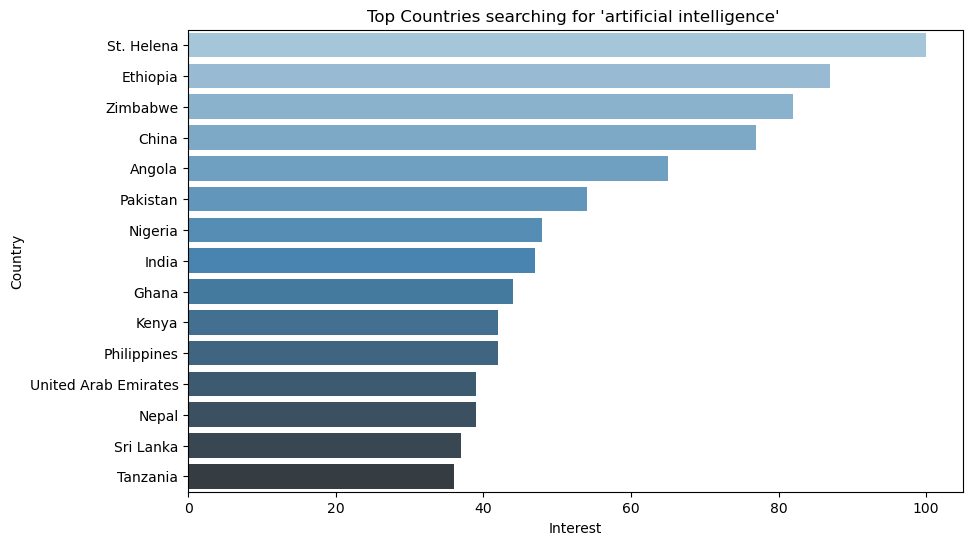

In [37]:
plt.figure(figsize =(10,6))
sns.barplot(x =region_data[keyword], y =region_data.index, palette ="Blues_d")
plt.title(f"Top Countries searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map

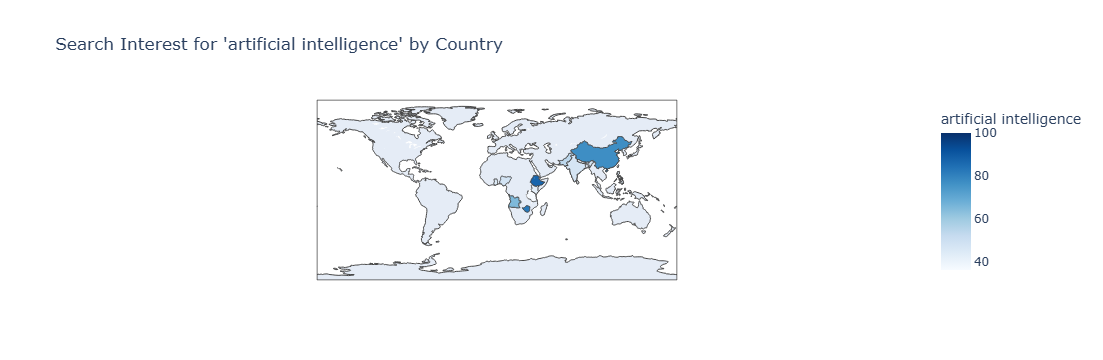

In [40]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data, locations ='geoName', locationmode = 'country names',
                    color =keyword,
                    title = f" Search Interest for '{keyword}' by Country",
                    color_continuous_scale ='Blues')
fig.show()

# Time wise Interest

In [43]:
time_df = pytrends.interest_over_time()

C:\Users\Admin\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



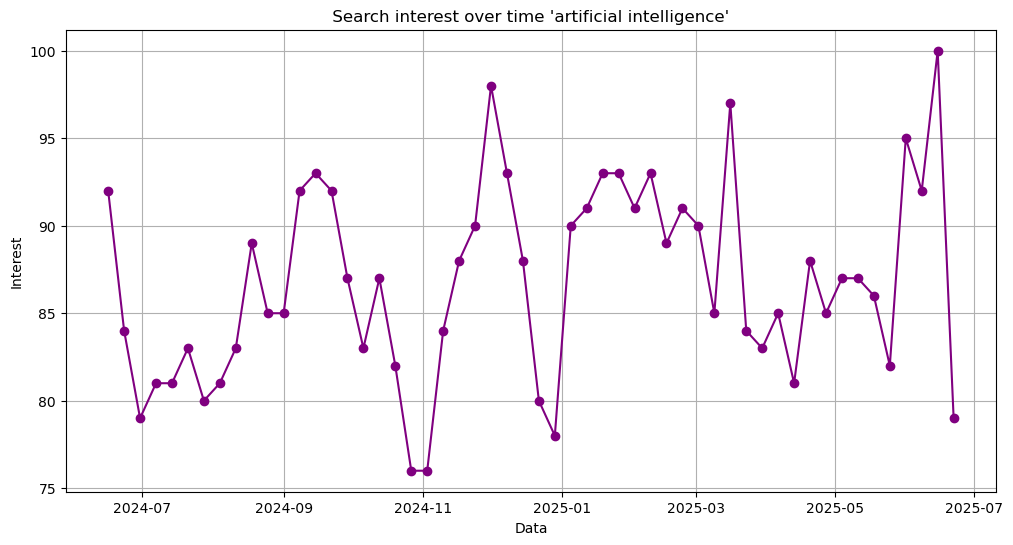

In [45]:
plt.figure(figsize =(12,6))
plt.plot(time_df.index, time_df[keyword], marker ='o', color = 'purple')
plt.title(f" Search interest over time '{keyword}' ")
plt.xlabel("Data")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple keyword compare

In [48]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat = 0, timeframe ='today 12-m',geo ='', gprop ='')

C:\Users\Admin\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



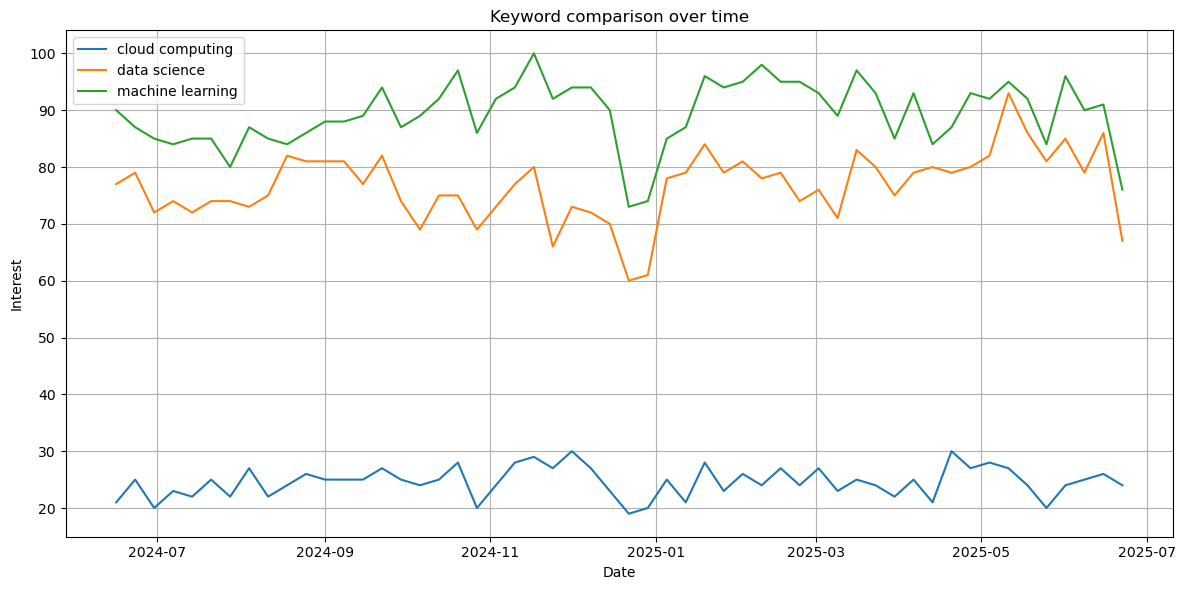

In [50]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize =(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label= kw)

plt.title("Keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
